In [19]:
from sklearn.datasets import load_digits
digtits = load_digits()

In [35]:
import numpy as np

In [51]:
X = load_digits().items()
X = dict(X)
type(X)
X['data'].shape, X['target'].shape, X['images'].shape

((1797, 64), (1797,), (1797, 8, 8))

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X['data'], X['target'], random_state=19 )

In [65]:
X_train.shape

(1347, 64)

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

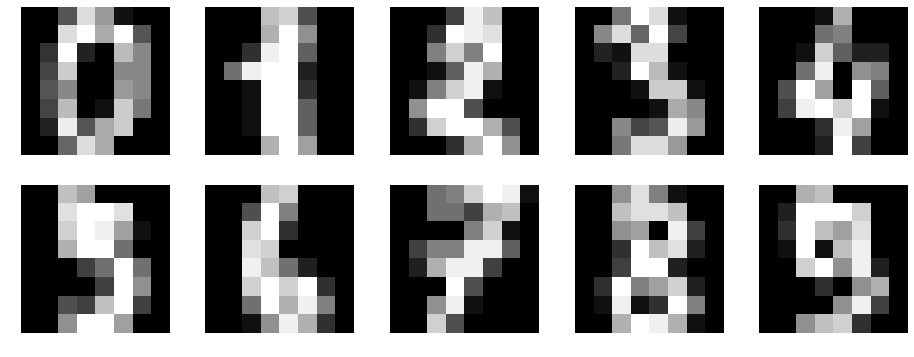

In [70]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X['images'][i, :], cmap='gray')
    plt.axis('off')


In [75]:
y_train.reshape(-1,1)

array([[6],
       [8],
       [4],
       ...,
       [4],
       [6],
       [6]])

In [76]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, dtype=np.float32,categories='auto')
y_train_pre = enc.fit_transform(y_train.reshape(-1, 1))

In [77]:
y_test_pre = enc.fit_transform(y_test.reshape(-1, 1))

In [78]:
X_train_pre = X_train.astype(np.float32) / 255.0
X_train_pre = X_train_pre.reshape((X_train.shape[0], -1))
X_test_pre = X_test.astype(np.float32) / 255.0
X_test_pre = X_test_pre.reshape((X_test.shape[0], -1))

In [79]:
import cv2
mlp = cv2.ml.ANN_MLP_create()

In [89]:
mlp.setLayerSizes(np.array([64, 1000, 1000, 10]))

In [90]:
mlp.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 2.5, 1.0)

In [91]:
mlp.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
mlp.setBackpropWeightScale(0.0001)

In [92]:
term_mode = cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS
term_max_iter = 10
term_eps = 0.01
mlp.setTermCriteria((term_mode, term_max_iter, term_eps))

In [93]:
mlp.train(X_train_pre, cv2.ml.ROW_SAMPLE, y_train_pre)

True

In [94]:
_, y_hat_train = mlp.predict(X_train_pre)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat_train.round(), y_train_pre)

0.9287305122494433

In [96]:
_, y_hat_test = mlp.predict(X_test_pre)
accuracy_score(y_hat_test.round(), y_test_pre)

0.8377777777777777